# 3-Model

In [592]:
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [567]:
data = pd.read_csv('../data/processed/processed_sc_player_data.csv')

In [568]:
features = data.drop(columns=['LeagueIndex'],axis=1)
target = data['LeagueIndex']

### Feature Selection with RandomForest

In [569]:
X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(features, target,test_size=0.3)

In [570]:
sfm = SelectFromModel(RandomForestClassifier(n_estimators = 100))

sfm.fit(X_sel_train, y_sel_train)

SelectFromModel(estimator=RandomForestClassifier())

In [571]:
selected_feat= features.columns[(sfm.get_support())]
len(selected_feat)

7

In [572]:
print(selected_feat)

Index(['HoursPerWeek', 'TotalHours', 'APM', 'AssignToHotkeys',
       'MinimapAttacks', 'NumberOfPACs', 'GapBetweenPACs'],
      dtype='object')


<Axes: >

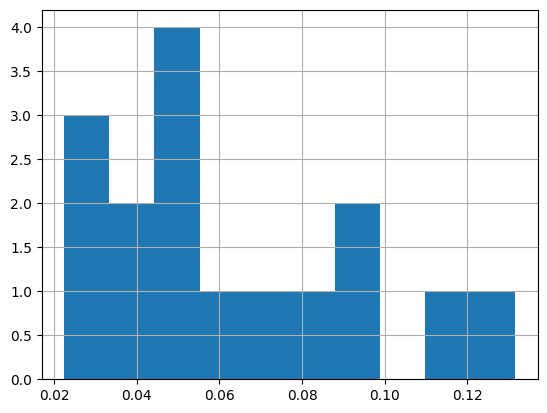

In [573]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

### Using selected features only

In [574]:
features = features[selected_feat]

X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.3,random_state=1)

### Logistic Regression

In [575]:
logreg = LogisticRegression(multi_class='ovr', solver='liblinear') # one vs. rest

In [576]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [577]:
y_preds = logreg.predict(X_test)

In [578]:
accuracy_score(y_test, y_preds)

0.41910631741140214

In [579]:
k_folds = KFold(n_splits = 5)

log_reg_scores = cross_val_score(logreg, X_train, y_train, cv = k_folds)
log_reg_scores

array([0.39163916, 0.42290749, 0.40528634, 0.41299559, 0.40859031])

In [580]:
np.average(log_reg_scores)

0.40828377991984216

### Naive Bayes Classifier

In [581]:
gnb = GaussianNB()

In [582]:
y_preds = gnb.fit(X_train, y_train).predict(X_test)

In [583]:
accuracy_score(y_test, y_preds)

0.46738572162300973

In [584]:
k_folds = KFold(n_splits = 5)

nb_scores = cross_val_score(gnb, X_train, y_train, cv = k_folds)
nb_scores

array([0.46534653, 0.47026432, 0.47356828, 0.49779736, 0.45594714])

In [585]:
np.average(nb_scores)

0.47258472543289576

In [594]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

##### Parameter Tuning 

In [595]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=6.579332246575682e-07)


In [596]:
y_preds = nbModel_grid.predict(X_test)
accuracy_score(y_test, y_preds)

0.46738572162300973

### Support Vector Machine

In [586]:
clf = svm.SVC()

In [587]:
y_preds = clf.fit(X_train, y_train).predict(X_test)

In [588]:
accuracy_score(y_test, y_preds)

0.4324601951720596

In [589]:
k_folds = KFold(n_splits = 5)

svm_scores = cross_val_score(clf, X_train, y_train, cv = k_folds)
svm_scores

array([0.39713971, 0.42621145, 0.41299559, 0.39537445, 0.41960352])

In [590]:
np.average(svm_scores)

0.41026494719956574

## Conclusion
GaussianNB gives us the best average score of .47. 